
![](https://raw.githubusercontent.com/cengineer13/modern_computer_vision/main/LOGO.png)

# **Single Shot Detectors (SSDs) with OpenCV**

####**In this lesson we'll learn how to use pre-trained models to implement an SSD in OpenCV**

Source - https://github.com/datitran/object_detector_app/tree/master/object_detection

#!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/SSDs.zip

In [2]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()
    

# 1. Tensorflow SSD version

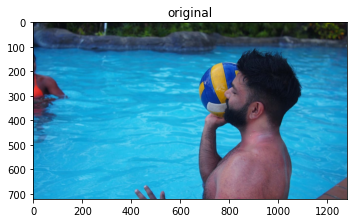

Running our Single Shot Detector on our image...


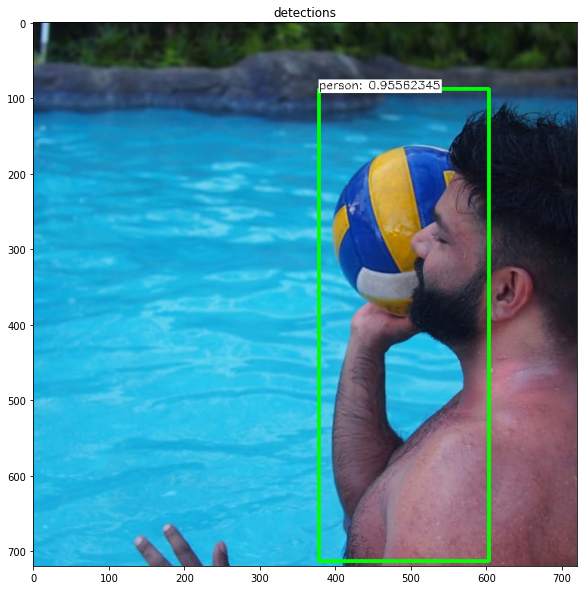

In [5]:
#Load our images
#frame = cv2.imread('Datasets/images/elephant.jpg')
frame = cv2.imread('Datasets/images/Volleyball.jpeg')
#frame = cv2.imread('Datasets/images/coffee.jpg')
#frame = cv2.imread('Datasets/images/hilton.jpeg')
#frame = cv2.imread('Datasets/images/tommys_beers.jpeg')
imshow("original", frame)

print("Running our Single Shot Detector on our image...")
# Make a copy of our loaded image
image = frame.copy()

# Set the widths and heights standarts for SSD model
inWidth = 300
inHeight = 300
WHRatio = inWidth / float(inHeight)

# These are needed for our preprocessing of our image
inScaleFactor = 0.007843
meanVal = 127.5

# Point to the paths of our weights and  model architecture in a protocol buffer 
prototxt = "Datasets/SSDs/ssd_mobilenet_v1_coco.pbtxt" #SSD architecture config file
weights = "Datasets/SSDs/frozen_inference_graph.pb"

# Number of classes 
num_classes = 90

# Probality Threshold
thr = 0.5

#load pretrained model
ssd_model = cv2.dnn.readNetFromTensorflow(weights, prototxt)

swapRB = True
classNames = { 0: 'background',
    1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus',
    7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light', 11: 'fire hydrant',
    13: 'stop sign', 14: 'parking meter', 15: 'bench', 16: 'bird', 17: 'cat',
    18: 'dog', 19: 'horse', 20: 'sheep', 21: 'cow', 22: 'elephant', 23: 'bear',
    24: 'zebra', 25: 'giraffe', 27: 'backpack', 28: 'umbrella', 31: 'handbag',
    32: 'tie', 33: 'suitcase', 34: 'frisbee', 35: 'skis', 36: 'snowboard',
    37: 'sports ball', 38: 'kite', 39: 'baseball bat', 40: 'baseball glove',
    41: 'skateboard', 42: 'surfboard', 43: 'tennis racket', 44: 'bottle',
    46: 'wine glass', 47: 'cup', 48: 'fork', 49: 'knife', 50: 'spoon',
    51: 'bowl', 52: 'banana', 53: 'apple', 54: 'sandwich', 55: 'orange',
    56: 'broccoli', 57: 'carrot', 58: 'hot dog', 59: 'pizza', 60: 'donut',
    61: 'cake', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed',
    67: 'dining table', 70: 'toilet', 72: 'tv', 73: 'laptop', 74: 'mouse',
    75: 'remote', 76: 'keyboard', 77: 'cell phone', 78: 'microwave', 79: 'oven',
    80: 'toaster', 81: 'sink', 82: 'refrigerator', 84: 'book', 85: 'clock',
    86: 'vase', 87: 'scissors', 88: 'teddy bear', 89: 'hair drier', 90: 'toothbrush' }

# Create our input image blob required for input into our network    
blob = cv2.dnn.blobFromImage(frame, inScaleFactor, (inWidth, inHeight), (meanVal, meanVal, meanVal), swapRB)
ssd_model.setInput(blob)

# Pass our input image/blob into the network
detections = ssd_model.forward()

# Crop frame if needed as we don't resize our input but take a square input
cols = frame.shape[1]
rows = frame.shape[0]

if cols / float(rows) > WHRatio:
    cropSize = (int(rows * WHRatio), rows)
else:
    cropSize = (cols, int(cols / WHRatio))

y1 = int((rows - cropSize[1]) / 2)
y2 = y1 + cropSize[1]
x1 = int((cols - cropSize[0]) / 2)
x2 = x1 + cropSize[0]
frame = frame[y1:y2, x1:x2]

cols = frame.shape[1]
rows = frame.shape[0]

# Iterate over every detection
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    # Once confidence is greater than the threshold we get our bounding box
    if confidence > thr:
        class_id = int(detections[0, 0, i, 1])

        xLeftBottom = int(detections[0, 0, i, 3] * cols)
        yLeftBottom = int(detections[0, 0, i, 4] * rows)
        xRightTop   = int(detections[0, 0, i, 5] * cols)
        yRightTop   = int(detections[0, 0, i, 6] * rows)

        # Draw our bounding box over our image 
        cv2.rectangle(frame, (xLeftBottom, yLeftBottom), (xRightTop, yRightTop),
                      (0, 255, 0), 3)
        # Get our class names and put them on our image (using a white background)
        if class_id in classNames:
            label = classNames[class_id] + ": " + str(confidence)
            labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)

            yLeftBottom = max(yLeftBottom, labelSize[1])
            cv2.rectangle(frame, (xLeftBottom, yLeftBottom - labelSize[1]),
                                 (xLeftBottom + labelSize[0], yLeftBottom + baseLine),
                                 (255, 255, 255), cv2.FILLED)
            cv2.putText(frame, label, (xLeftBottom, yLeftBottom),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))

# Show our detections
imshow("detections", frame)

### 1.1 Real time tensorflow version

# 2. MobileNet SSD on Caffe model (Trained on Caffe framework) 
# Real -time webcam detection

In [21]:
prototxt = "Datasets/SSDs/caffe_mobilessd/deploy.prototxt"
caffe_model = "Datasets/SSDs/caffe_mobilessd/mobilenet_iter_73000.caffemodel"
conf_threshold = 0.5



# initialize the list of class labels MobileNet SSD was trained to
# detect, then generate a set of bounding box colors for each class
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat",
           "bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
           "dog", "horse", "motorbike", "person", "pottedplant", "sheep",
           "sofa", "train", "tvmonitor"]
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

print('Loading Caffe model...')
model = cv2.dnn.readNetFromCaffe(prototxt, caffe_model)

video = cv2.VideoCapture(0)

while video.isOpened():

    # load the input image and construct an input blob for the image
    # by resizing to a fixed 300x300 pixels and then normalizing it
    # (note: normalization is done via the authors of the MobileNet SSD
    # implementation)
    ret, frame = video.read()
    (h, w) = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 0.007843, 
                                 (300, 300), 127.5) 
    #model predicting 
    print("Computing object detections...")
    model.setInput(blob)
    detections = model.forward() 

    # loop over the detections
    for i in np.arange(0, detections.shape[2]):
        # extract the confidence (i.e., probability) associated with the prediction
        confidence = detections[0, 0, i, 2]
        # filter out weak detections by ensuring the `confidence` is
        # greater than the minimum confidence
        if confidence > conf_threshold:
            # extract the index of the class label from the `detections`,
            # then compute the (x, y)-coordinates of the bounding box for
            # the object
            idx = int(detections[0, 0, i, 1])
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            # display the prediction
            label = "{}: {:.2f}%".format(CLASSES[idx], confidence * 100)
            print("[INFO] {}".format(label))
            cv2.rectangle(frame, (startX, startY), (endX, endY), COLORS[idx], 2)
            y = startY - 15 if startY - 15 > 15 else startY + 15
            cv2.putText(frame, label, (startX, y),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)

    cv2.imshow('Result', frame)
    if cv2.waitKey(1) & 0xFF ==ord('q'):
        break
        
video.release()
cv2.destroyAllWindows()


Loading Caffe model...
Computing object detections...
[INFO] person: 95.79%
Computing object detections...
[INFO] person: 98.20%
Computing object detections...
[INFO] person: 95.58%
Computing object detections...
[INFO] person: 98.64%
Computing object detections...
[INFO] person: 97.85%
Computing object detections...
[INFO] person: 98.69%
Computing object detections...
[INFO] person: 96.22%
Computing object detections...
[INFO] person: 95.90%
Computing object detections...
[INFO] person: 89.99%
Computing object detections...
[INFO] person: 79.72%
Computing object detections...
[INFO] person: 97.42%
Computing object detections...
[INFO] person: 95.92%
Computing object detections...
[INFO] person: 93.40%
Computing object detections...
[INFO] person: 93.06%
Computing object detections...
[INFO] person: 88.12%
Computing object detections...
[INFO] person: 90.06%
Computing object detections...
[INFO] person: 94.15%
Computing object detections...
[INFO] person: 98.02%
Computing object detect

[INFO] person: 93.14%
Computing object detections...
[INFO] person: 90.39%
Computing object detections...
[INFO] person: 90.10%
Computing object detections...
[INFO] person: 93.71%
Computing object detections...
[INFO] person: 96.77%
Computing object detections...
[INFO] person: 96.50%
Computing object detections...
[INFO] person: 98.07%
Computing object detections...
[INFO] person: 99.35%
Computing object detections...
[INFO] person: 99.29%
Computing object detections...
[INFO] person: 99.39%
Computing object detections...
[INFO] person: 99.09%
Computing object detections...
[INFO] person: 99.17%
Computing object detections...
[INFO] person: 98.33%
Computing object detections...
[INFO] person: 99.33%
Computing object detections...
[INFO] person: 99.19%
Computing object detections...
[INFO] person: 98.26%
Computing object detections...
[INFO] person: 98.43%
Computing object detections...
[INFO] person: 98.54%
Computing object detections...
[INFO] person: 98.30%
Computing object detecti

[INFO] person: 89.57%
Computing object detections...
[INFO] person: 89.20%
Computing object detections...
[INFO] person: 86.72%
Computing object detections...
[INFO] person: 87.95%
Computing object detections...
[INFO] person: 92.64%
Computing object detections...
[INFO] person: 91.97%
Computing object detections...
[INFO] person: 91.02%
Computing object detections...
[INFO] person: 94.16%
Computing object detections...
[INFO] person: 89.81%
Computing object detections...
[INFO] person: 91.39%
Computing object detections...
[INFO] person: 88.57%
Computing object detections...
[INFO] person: 90.73%
Computing object detections...
[INFO] person: 97.80%
Computing object detections...
[INFO] person: 91.57%
Computing object detections...
[INFO] person: 95.42%
Computing object detections...
[INFO] person: 96.03%
Computing object detections...
[INFO] person: 97.27%
Computing object detections...
[INFO] person: 93.81%
Computing object detections...
[INFO] person: 95.90%
Computing object detecti

Computing object detections...
[INFO] person: 78.74%
Computing object detections...
Computing object detections...
[INFO] person: 54.35%
Computing object detections...
[INFO] person: 91.04%
Computing object detections...
[INFO] person: 98.74%
Computing object detections...
[INFO] person: 99.79%
Computing object detections...
[INFO] person: 98.05%
Computing object detections...
[INFO] person: 99.24%
Computing object detections...
[INFO] person: 99.32%
Computing object detections...
[INFO] person: 99.37%
Computing object detections...
[INFO] person: 98.57%
Computing object detections...
[INFO] person: 99.14%
Computing object detections...
[INFO] person: 93.19%
Computing object detections...
Computing object detections...
Computing object detections...
Computing object detections...
[INFO] person: 87.22%
Computing object detections...
[INFO] bottle: 76.31%
Computing object detections...
Computing object detections...
Computing object detections...
[INFO] bottle: 71.47%
[INFO] bottle: 51.7

[INFO] bottle: 95.94%
[INFO] person: 99.71%
Computing object detections...
[INFO] bottle: 95.04%
[INFO] person: 99.73%
Computing object detections...
[INFO] bottle: 96.05%
[INFO] person: 99.81%
Computing object detections...
[INFO] bottle: 94.73%
[INFO] person: 99.67%
Computing object detections...
[INFO] bottle: 95.77%
[INFO] person: 99.72%
Computing object detections...
[INFO] bottle: 94.49%
[INFO] person: 99.75%
Computing object detections...
[INFO] bottle: 96.42%
[INFO] person: 99.80%
Computing object detections...
[INFO] bottle: 96.53%
[INFO] person: 99.77%
Computing object detections...
[INFO] bottle: 96.70%
[INFO] person: 99.80%
Computing object detections...
[INFO] bottle: 95.78%
[INFO] person: 99.81%
Computing object detections...
[INFO] bottle: 95.42%
[INFO] person: 99.81%
Computing object detections...
[INFO] bottle: 90.55%
[INFO] person: 99.79%
Computing object detections...
[INFO] bottle: 90.60%
[INFO] person: 99.86%
Computing object detections...
[INFO] bottle: 86.36%
[IN

[INFO] person: 99.13%
Computing object detections...
[INFO] person: 99.39%
Computing object detections...
[INFO] person: 99.21%
Computing object detections...
[INFO] person: 99.26%
Computing object detections...
[INFO] person: 99.39%
Computing object detections...
[INFO] person: 99.56%
Computing object detections...
[INFO] person: 99.39%
Computing object detections...
[INFO] chair: 66.58%
[INFO] person: 98.92%
Computing object detections...
[INFO] chair: 53.68%
[INFO] person: 99.01%
Computing object detections...
[INFO] chair: 62.72%
[INFO] person: 98.84%
Computing object detections...
[INFO] chair: 82.36%
[INFO] person: 98.97%
Computing object detections...
[INFO] chair: 75.63%
[INFO] person: 98.99%
Computing object detections...
[INFO] chair: 63.49%
[INFO] person: 99.03%
Computing object detections...
[INFO] chair: 64.38%
[INFO] person: 98.11%
Computing object detections...
[INFO] chair: 50.42%
[INFO] person: 97.77%
Computing object detections...
[INFO] person: 96.92%
Computing objec

Computing object detections...
[INFO] person: 84.98%
Computing object detections...
[INFO] person: 88.93%
Computing object detections...
[INFO] chair: 67.10%
[INFO] person: 89.62%
Computing object detections...
[INFO] chair: 70.49%
[INFO] person: 80.90%
Computing object detections...
[INFO] chair: 72.39%
[INFO] person: 78.35%
Computing object detections...
[INFO] chair: 83.01%
[INFO] person: 71.34%
Computing object detections...
[INFO] chair: 78.78%
[INFO] person: 77.31%
Computing object detections...
[INFO] chair: 73.64%
[INFO] person: 87.97%
Computing object detections...
[INFO] chair: 74.93%
[INFO] diningtable: 54.70%
[INFO] person: 62.57%
Computing object detections...
[INFO] diningtable: 90.41%
Computing object detections...
[INFO] chair: 61.24%
[INFO] diningtable: 89.08%
Computing object detections...
[INFO] chair: 73.42%
[INFO] diningtable: 83.06%
Computing object detections...
[INFO] chair: 83.20%
[INFO] diningtable: 59.75%
Computing object detections...
[INFO] chair: 72.95%
[I

[INFO] chair: 99.38%
[INFO] person: 67.92%
Computing object detections...
[INFO] chair: 99.09%
[INFO] person: 82.90%
Computing object detections...
[INFO] chair: 99.28%
[INFO] person: 79.09%
Computing object detections...
[INFO] chair: 98.63%
[INFO] person: 83.65%
Computing object detections...
[INFO] chair: 99.20%
[INFO] person: 74.00%
Computing object detections...
[INFO] chair: 99.08%
[INFO] person: 80.60%
Computing object detections...
[INFO] chair: 99.27%
[INFO] person: 77.64%
Computing object detections...
[INFO] chair: 99.23%
[INFO] person: 62.57%
Computing object detections...
[INFO] chair: 98.72%
[INFO] person: 55.36%
Computing object detections...
[INFO] chair: 98.40%
Computing object detections...
[INFO] chair: 98.08%
Computing object detections...
[INFO] chair: 98.15%
Computing object detections...
[INFO] chair: 90.77%
Computing object detections...
[INFO] chair: 80.25%
Computing object detections...
[INFO] chair: 55.01%
Computing object detections...
[INFO] chair: 58.48%
C

In [16]:
detections.shape

(1, 1, 100, 7)

In [17]:
confidence = detections[0, 0, i, 2]

In [18]:
confidence

0.0